# Walmart Sales Forecasting

Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, walmart has provided a data combining of 45 stores including store information and monthly sales.The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labour day. Here we are owing to Analyse the dataset given. before doing that , let me point out the objective of this analysis.

As in dataset size and datae are given as feature, so Analyse if sales are impacted by time based factors and space based factor.

Or Sales have any relation with Department type.

Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data

Most Importantly impact of holidays week plunge the sales in store?


### Why This problem Needs to be Solved?

Holidays can create a huge impact on sales. So,if there is a good prediction on Sales then Walmart can Calculate how much product to order.It will help in predict which products needs to be purchased during the holiday time.As customers planning to buy something expect the products they want to be available immediately. And through prediction they can figure out which product will require at which time . Thus get the trust of Customer on walmart. This problem can also solves the issue  of Marketing Campaings. As Forecasting is often used to adjust ads and marketing campaigns and can influence the number of sales. As Stated by Walmart, walmart runs several markdown events throughout the year. And these markdown event precede to the prominent holidays.So to solve the issue walmart can organize such events more efficiently.

### How Machine Learning Is helping in Solving the Problem?

Time Series data known to have linearity.A simple mean or median model can't map the linear reltionship efficiently or at all. Therefore, A Machine Learning model like, a linear regression model can provide robust prediction given the dataset satisfies its linearity assumptions.Furthermore, machine learning forecasting is not black box; the influence of model inputs can be weighed and understood so that the forecast is intuitive and transparent.Machine Learning models can also be updated and become adabtable to the changes in dataset. 

And Also through machine learning help, connections between markdown events and weekly_sales can be flourish using machine learning model. As markdown values are only given after noverber 2011.So through machine learning we canfind those values using regression model.

**What is Weighted Mean Absolute Error(WMAE)**

$WMAE = \frac{1}{\Sigma_{i}w_{i}}\Sigma_{i}w_{i}{|y_{i} - \hat{y}_i|}$


where

n is the number of rows

\\( \hat{y}_i \\) is the predicted sales

\\( y_i \\) is the actual sales

\\( w_i \\) are weights. w = 5 if the week is a holiday week, 1 otherwise




**Why Are we Using WMAE as my Performance metric?**

First of All, let's see why not to use RMSE(root mean square error) and use MAE instead.
The Dataset given is not large dataset so the impact of outlier points will impact more than usual. And using RMSE it can make increase the impact more than twice than the MAE.
Let's say we have two models for your problem (M1 and M2). 
Let's say wwe have 4 normal points and  1 outlier. let's have actual sale is normal week sales have mean around 10 and outlier have sales 100. Model 1 predicted sales for normal week with mean of let's say 11 and for outlier 110. And model 2 predicted for normal week with mean of 14 and for outlier of 105.
 the N indenominator is conastant both the case
calculate MAE for outlier point Model 1 : 110-100=10
calculate MSE for outlier point Model 1 : (110-100)^2=100

calculate MAE for outlier point Model 1 : 105-100=5
calculate MSE for outlier point Model 1 : (105-100)^2=25



The RMSE value of model 1 will be = square_root(100+1+1+1+1) = 10.9 and for model 2 =sqaure_root(25+3+3+3+3) = 6.08. As RMSE of model 1  is greater than model 2 is greater just because of a single outlier point it will discard model 1 which in  reality is performing better.

Whereas,
MAE of model 1 = 14
MAE of model 2 = 17

Clearly MAE is less impacted by outlier in smaller Datset.

Now here we are using WMAE instead of normal MAE as we need to increase the impact of Holidays week sales as walmart plans events according to the holidays coming. Aand clearly WMAE does that as it give more weightage 5 times more weightage to the weeks where there is a holiday.



### Dataset Information

There are four dataset provided by Walmart:
Stores.csv:
it has three column:

Store: stores numbered from 1 to 45

Size : stores size has provided

type : store tpye has been provided ,there are  4 types - A,B,C and D.

Train.csv :
 Store - the store number
 
 Dept - the department number
 
 Date - the week
 
 Weekly_Sales - sales for the given department in the given store
 
 IsHoliday - whether the week is a special holiday week
 
Test.csv is same as train.csv except it has no Weekly_Sales Column.

features.csv:
Store - the store number

Date - the week

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running.MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.
3
CPI - the consumer price index

Unemployment - the unemployment rate

IsHoliday - whether the week is a special holiday week


In [ ]:
#lets import the required libraries.
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualization
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

#machine Learning models Libraries
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Date related Libraries
from datetime import date
import holidays
import datetime

#Deeplearning related Libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [2]:
#Computing Performance Metrics
def WMAE(dataset, real, predicted):
  
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [ ]:
# This Function is creating a category where each holiday from all 4 holidays will be a seperate category.
def create_Holiday_Type(df):
    def create_holiday_type_column(df, dates, holiday_type, name):
        df.loc[
            df['Date'].isin(dates),
            'HolidayType'
        ] = holiday_type

    df['HolidayType'] = -1
    
    holiday_list = [
        (['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'], 'Super_Bowl'),
        (['2010-09-10','2011-09-09', '2012-09-07', '2013-09-06'], 'Labor_Day'),
        (['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'], 'Thanksgiving'),
        (['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'], 'Christmas')
    ]
    
    for index in range(0, len(holiday_list)):
        holiday = holiday_list[index]
        create_holiday_type_column(df, holiday[0], index, holiday[1])
    
    for x in df:
        if df[x].dtypes == "int64":
            df[x] = df[x].astype(float)

In [ ]:
#here we are plotting features in decreasing order of theit importace while finding Sales using machine learning models
def plot_features_importance(importance, names, model_type):
    """
    This function plots the model features importance 
    """
    feature_importance = np.array(importance)
    feature_names = np.array(names)


    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10, 7))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(f'{model_type} - Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

In [ ]:
#here we are creating Markdown features copies to find the Nan values later
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
#https://stackoverflow.com/questions/52083501/how-to-compute-correlation-ratio-or-eta-in-python#:~:text=According%20the%20answer%20to%20this,%3D%20that%20of%20the%20ANOVA).

#This function is creating eta square test
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta


In [ ]:
#this funtion will be training datset using Random forest Model
def random_forest(n_estimators, max_depth):
    for estimator in n_estimators:
        for depth in max_depth:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', n_estimators:', estimator, ', max_depth:', depth)
                RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
                X_train, X_test, y_train, y_test = train_test_split(data, train['Weekly_Sales'], test_size=0.2)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_test)
                wmaes_cv.append(WMAE(X_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv))

In [ ]:
#this funtion will be training datset using GBDT Model
def gbdt(n_estimators, max_depth):
    for estimator in n_estimators:
        for depth in max_depth:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', n_estimators:', estimator, ', max_depth:', depth)
                RF = lgb.LGBMRegressor(n_estimators=estimator, max_depth=depth)
                X_train, X_test, y_train, y_test = train_test_split(data, train['Weekly_Sales'], test_size=0.2)
                
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_test)
                wmaes_cv.append(WMAE(X_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv))

In [ ]:
#this funtion will be training datset using Elastic Net(Linear Regression) Model
def linear_regression(l1_ratio):
    for l1 in l1_ratio:
          wmaes_cv = []
          for i in range(1,5):
              print('k:', i, ', l1_ratio:', l1)
              lr = ElasticNet(random_state=0,normalize = True,l1_ratio = l1)
              X_train, X_test, y_train, y_test = train_test_split(data, train['Weekly_Sales'], test_size=0.2)
              t = MinMaxScaler()
              t.fit(X_train)
              train_data = t.transform(X_train)
              test_data = t.transform(X_test)
              lr.fit(train_data, y_train)
              predicted = lr.predict(test_data)
              wmaes_cv.append(WMAE(X_test, y_test, predicted))
          print('WMAE:', np.mean(wmaes_cv))

In [ ]:
#This function will predict the weekly_sales on Test dataset and then create a file to find the WMAE score using kaggle site.
#it will take models and a number in string as input
def predict_Sales(model,number)
    predicted=model.predict(data_test)
    column1=[]
    column2=[]
    for index, row in test.iterrows():  
        store = str(int(test['Store'][index]))
        dept = str(int(test['Dept'][index]))
        date = str(test['Date'][index]).split(" ")[0]
        value = predicted[index]
        a = store+"_"+dept+"_"+date
        column1.append(a)
        column2.append(value)

    col = {'Id': column1, 'Weekly_Sales': column2}
    test_df = pd.DataFrame(data=col)
    string = Submission_file + number
    test_df.to_csv(string, index=False)

In [3]:
#Reading the dataset in Pandas
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
stores=pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [ ]:
# first lets look at the shape of train and test datasets
print("the structure of train data is ", train.shape)
print("the structure of test  data is ", test.shape)


the structure of train data is  (421570, 5)
the structure of test  data is  (115064, 4)


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [6]:
# lets convert date column into datetime type

train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)
features.Date = pd.to_datetime(features.Date)

In [ ]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

Since We are preedicting a sales. So let's exract the time based feature from Date feature

In [7]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week
train['Day']=train['Date'].dt.day
train['n_days']=(train['Date'].dt.date-train['Date'].dt.date.min()).apply(lambda x:x.days)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,HolidayType,Year,Month,Week,Day,n_days
0,1.0,1.0,2010-02-05,24924.50,False,-1.0,2010,2,5,5,0
1,1.0,1.0,2010-02-12,46039.49,True,0.0,2010,2,6,12,7
2,1.0,1.0,2010-02-19,41595.55,False,-1.0,2010,2,7,19,14
3,1.0,1.0,2010-02-26,19403.54,False,-1.0,2010,2,8,26,21
4,1.0,1.0,2010-03-05,21827.90,False,-1.0,2010,3,9,5,28


#### Now Let's see the impact of holidays on Sales

In [ ]:
print("Holiday")
print(train[train['IsHoliday']==True]['Weekly_Sales'].describe())
print("Non-Holiday")
print(train[train['IsHoliday']==False]['Weekly_Sales'].describe())

Holiday
count     29661.000000
mean      17035.823187
std       27222.000409
min        -798.000000
25%        2078.540000
50%        7947.740000
75%       21189.250000
max      693099.360000
Name: Weekly_Sales, dtype: float64
Non-Holiday
count    391909.000000
mean      15901.445069
std       22330.747450
min       -4988.940000
25%        2079.750000
50%        7589.950000
75%       20131.210000
max      406988.630000
Name: Weekly_Sales, dtype: float64


If you see sales in holiday week are more than sales in non-holiday week

#### Now Let's check if there is any trend , fluctuation or random event happen during the period of time provided.

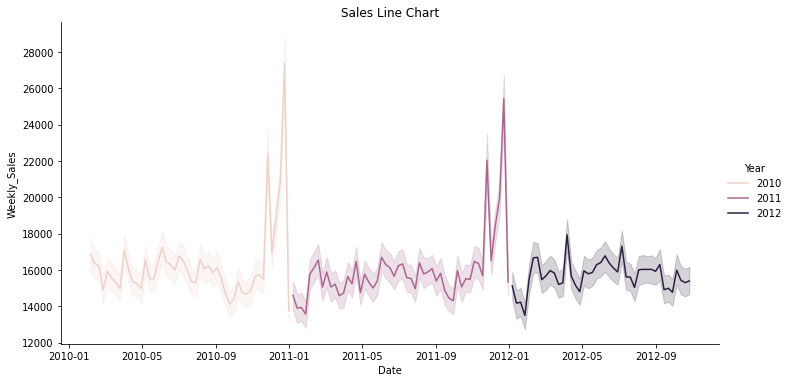

In [ ]:
#https://medium.com/swlh/relplot-in-seaborn-69123bedcfe4
sns.relplot(x='Date',y='Weekly_Sales',hue='Year',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

It can be seen through Line chart that there is no trend in year wise and no random event also happen in any year.

Also it can be seen that at the end of the year there is hufe sales compared to other month whih tells that christmas and thanksgiving has more impact on sales compared to Super Bowl ,Labour Day.

So We can create features where we can give seperate category for each holiday.

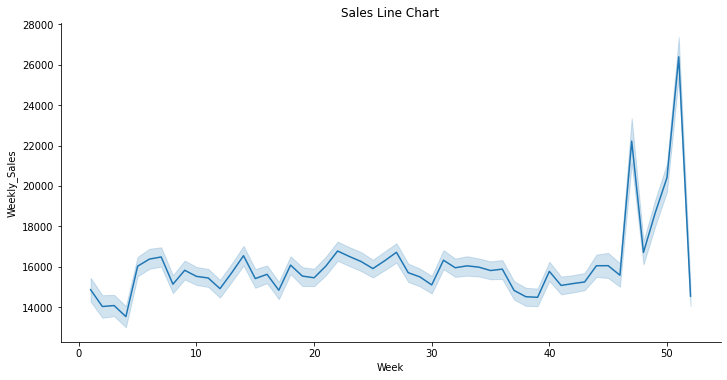

In [ ]:
sns.relplot(x='Week',y='Weekly_Sales',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

Here Also it can be seen that week 45 to 50 have higher sales where christmas and thanksgiving comes.

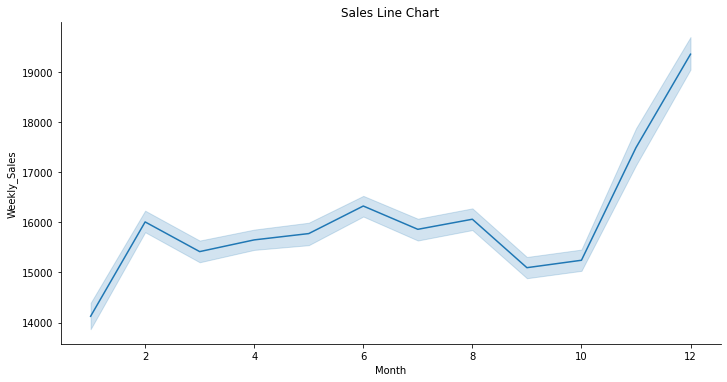

In [ ]:
sns.relplot(x='Month',y='Weekly_Sales',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

It can be seen that in november and december sales are very high compared to other month wich tells the impact of thanksgiving and christmas on sales.

In [8]:
#using merge function we can get union of two dataframes
# here we are merging train with features and sotres dataframes.
stores = stores.merge(features, on ='Store' , how = 'left')
train = train.merge(stores, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day,n_days,Holidays,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,0,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,7,0,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,2010,2,7,19,14,1,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,2010,2,8,26,21,0,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,2010,3,9,5,28,0,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


#### Let's check which features are more correlated to weekly_sales 

#### Correlation between Categorical deatures with weekly_sales 

To check the correlation between Categorical features and Numerical_feature we are using Eta Square Test. As Normal strategies like Pearson or spearman Are useful for numerical features only.

For that , we are using Eta Square Test 

$\eta^2 = \frac{SS_{between}}{SS_{total}}$

$SS_{between}$ = sum of square for the Interaction you are studying

$SS_{total}$ = total sums of squares for all effects, errors and interactions.

Interpret ${\displaystyle \eta ^{2}}$:

.01 ~ small (very less Correlated)

.06 ~ medium (Less correlated)

greater than .14 ~ large (high correlated)

In [ ]:
print("Correlation of store feature with weekly_sales")
print(correlation_ratio(train['Store'],train['Weekly_Sales']))
print(50*'*')
print("Correlation of Department feature with weekly_sales")
print(correlation_ratio(train['Dept'],train['Weekly_Sales']))
print(50*'*')
print("Correlation of Type feature with weekly_sales")
print(correlation_ratio(train['Type'],train['Weekly_Sales']))
print(50*'*')

Correlation of store feature with weekly_sales
0.09320619110455744
**************************************************
Correlation of Department feature with weekly_sales
0.5368007370698533
**************************************************
Correlation of Type feature with weekly_sales
1.8841978383051284e-07
**************************************************


As it can be see that correlation between Department and Weekly_sales is highest.
Store and Type is Also Correlated

#### Correlation of  Numerical feature with Weekly_sales

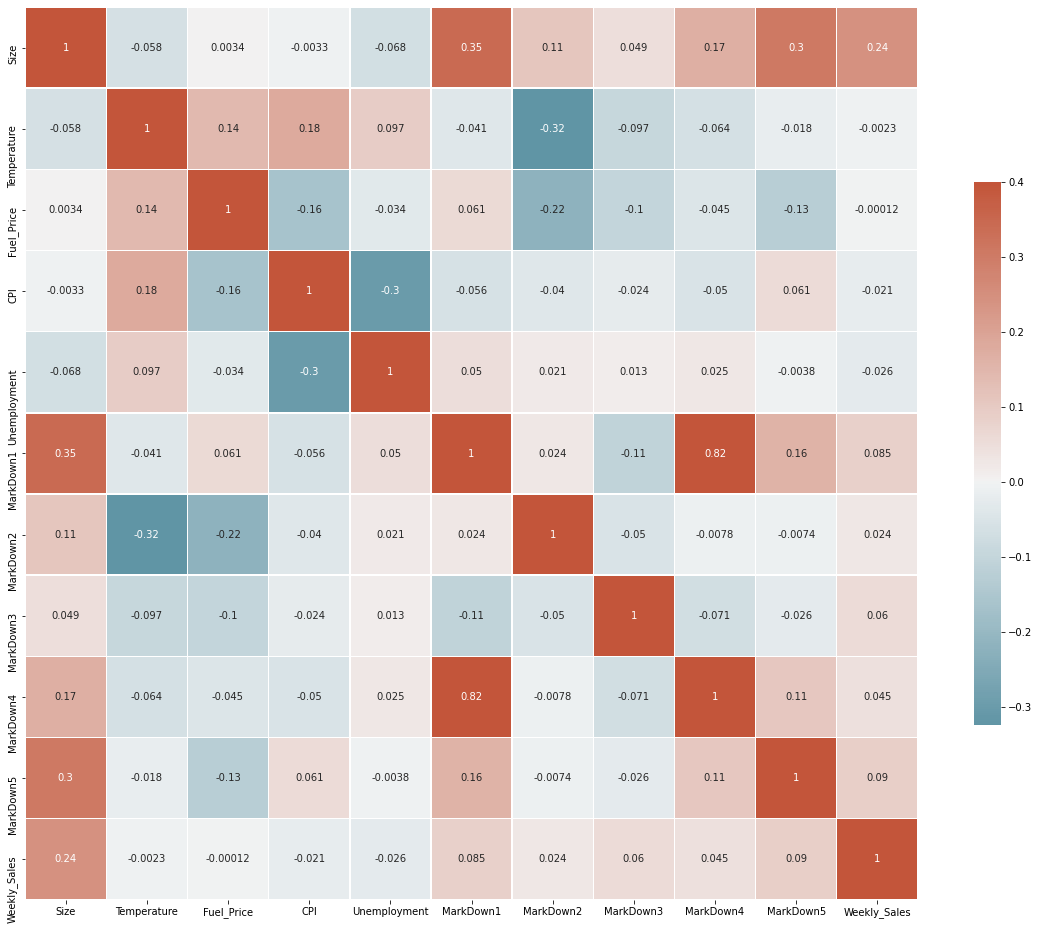

In [ ]:
data = pd.concat([train['Size'], train['Temperature'],train['Fuel_Price'],train['CPI'],train['Unemployment'],
                  train['MarkDown1'],train['MarkDown2'],train['MarkDown3'],train['MarkDown4'],
                  train['MarkDown5'],train['Weekly_Sales']], axis=1)
corr = data.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.4, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [ ]:
https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

It can be seen through heatmap size is highly correlated to weekly_sales 
Markdown features are also somewhat correlated to weekly_sales.
Also it can be see that markdown1 ad markdown 4 are highly correlated.(Assumption: One is Colinearly related to other one)
Too many features are correlated with Size of Store.(Assumption : Size is and important Feature)

## Let's check which features are important using Simple Random Forest model.

In [ ]:

data = train.loc[:, train.columns != 'Weekly_Sales']
data = data.loc[:, data.columns != 'Date']
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
d=imp.fit_transform(pd.concat([data['MarkDown1'],data['MarkDown2'],
                               data['MarkDown3'],data['MarkDown4'],data['MarkDown5']],axis = 1))
data['MarkDown1'] = d[:,0]
data['MarkDown2'] = d[:,1]
data['MarkDown3'] = d[:,2]
data['MarkDown4'] = d[:,3]
data['MarkDown5'] = d[:,4]
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(data, train['Weekly_Sales'])


RandomForestRegressor()

In [ ]:
feature_importance_values=clf.feature_importances_
features = np.array(data.columns)
important_features = [x for _,x in sorted(zip(feature_importance_values,features),reverse=True)]
print("Top 5 Important Features:")
print(important_features[0:5])

Top 5 Important Features:
['Dept', 'Size', 'Store', 'Week', 'CPI']


#### Let's look at the type of values in Stores dataset.

In [ ]:
print("the shape of stores data set is: ", stores.shape)
print("the unique value of store is: ", stores['Store'].unique())
print("the unique value of Type is: ", stores['Type'].unique())
# As store size is a numerical real valued feature.

the shape of stores data set is:  (8190, 14)
the unique value of store is:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
the unique value of Type is:  ['A' 'B' 'C']


As store type has three type, i.e , A,B and C. let's look at the ratio of A,B and C type of walmart stores through pie chart.

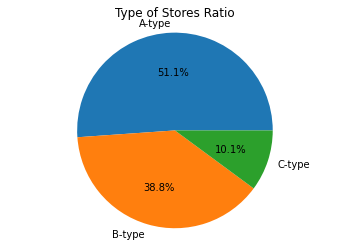

In [ ]:
Count_A,Count_B,Count_C = train['Type'].value_counts()
Tasks = [Count_A,Count_B,Count_C]

i_labels = 'A-type','B-type','C-type'
plt.pie(Tasks,labels=i_labels,autopct='%1.1f%%')
plt.title('Type of Stores Ratio')
plt.axis('equal')
plt.show()

As it can be seen that there are many stores of A-type and very less stores of C-type

Now let's look in terms of ratio of total size of each stores.

In [ ]:
grouped=stores.groupby('Type')
print(grouped.describe()['Size'])

      count           mean           std      min        25%       50%  \
Type                                                                     
A      22.0  177247.727273  49392.621098  39690.0  155840.75  202406.0   
B      17.0  101190.705882  32371.137916  34875.0   93188.00  114533.0   
C       6.0   40541.666667   1304.145033  39690.0   39745.00   39910.0   

           75%       max  
Type                      
A     203819.0  219622.0  
B     123737.0  140167.0  
C      40774.0   42988.0  


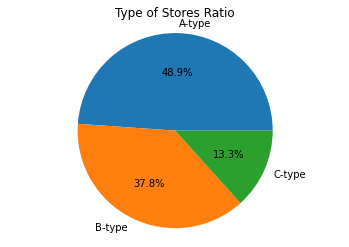

In [ ]:
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
i_labels = 'A-type','B-type','C-type'
plt.pie(sizes,labels=i_labels,autopct='%1.1f%%')
plt.title('Type of Stores Ratio')
plt.axis('equal')
plt.show()

Let's also Look at the box plot of each type of store w.r.t to size

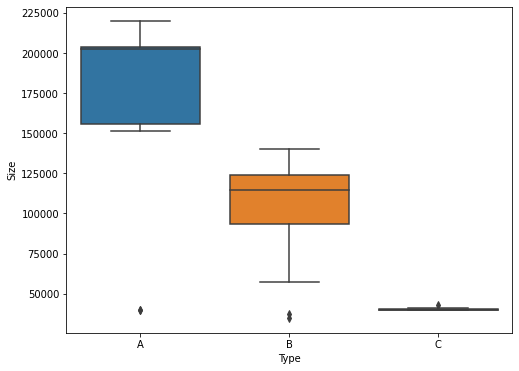

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=train)

Conclusion:
Looking at the pie chart you can figure out that type is alias to the size. type A has stores of largest size ,then B and finally C.

Looking at he box plot, it can be seen that box plot of A is not even ovelapping at any point which means that the conclusion of sizes of Stores w.r.t to type stands strong.

Now Let's see if size has to do anything with weekly sales.

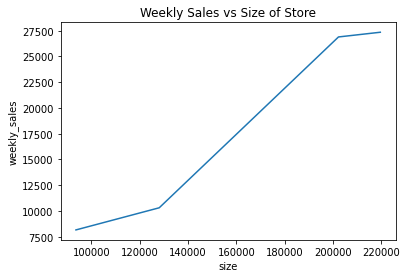

In [ ]:
grouped_1=train.groupby('Size')
weekly_sales=list(grouped_1.mean()['Weekly_Sales'])
sq = (grouped_1['Size'].unique())
size = [i[0] for i in list(sq)]
weekly_sales = [x for _,x in sorted(zip(size,weekly_sales))]
size.sort()
sizes = []
for i in range(len(size)):
    if(i+1 == len(size)):
        sizes.append(size[i])
    elif ((i+1)%10==0):
        sizes.append(size[i])
weekly_sale=[]
for i in range(len(size)):
    if(i+1 == len(size)):
        weekly_sale.append(weekly_sales[i])
    elif ((i+1)%10==0):
        weekly_sale.append(weekly_sales[i])
weekly_sales
plt.plot(sizes, weekly_sale)
plt.title('Weekly Sales vs Size of Store')
plt.xlabel('size')
plt.ylabel('weekly_sales')
plt.show()

through this line chart it can be seen that as size increases, weekly sales also increases.

Now Let's look the sales of storefor each type of store using box plot.

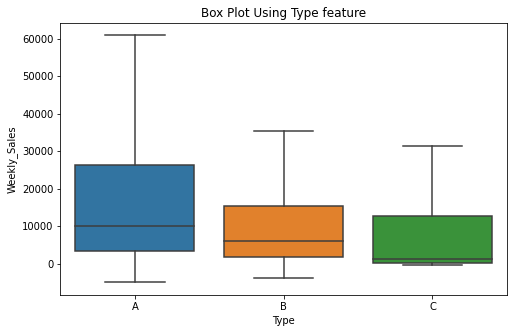

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Type feature")
plt.show()

through box plot ,we can see that median of each type of store decreases from left to right means from A store to C.
So we can conclude that type is an import categorical feature to predict weekly sales. And plays role in increasing sales of a store.

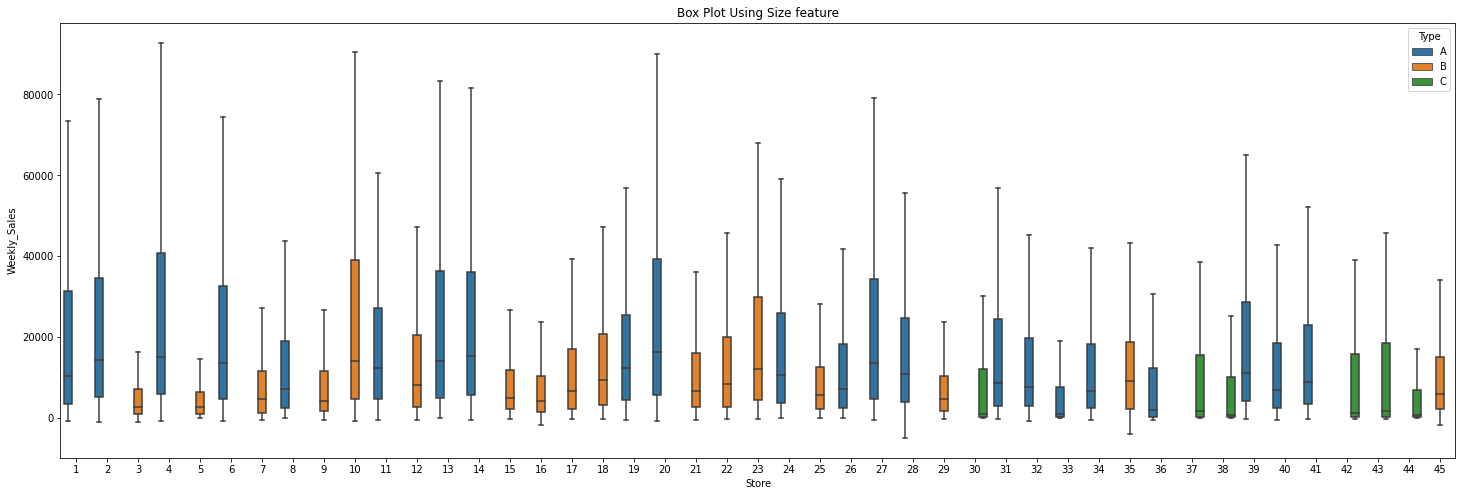

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data=train,showfliers=False, hue="Type")
plt.title("Box Plot Using Size feature")
plt.show()

Store feature is an useful feature to predict sales. As it comprises of department, size or type and also region as well which was not provided in dataset.

Let's see impact of holidays on sales of the store

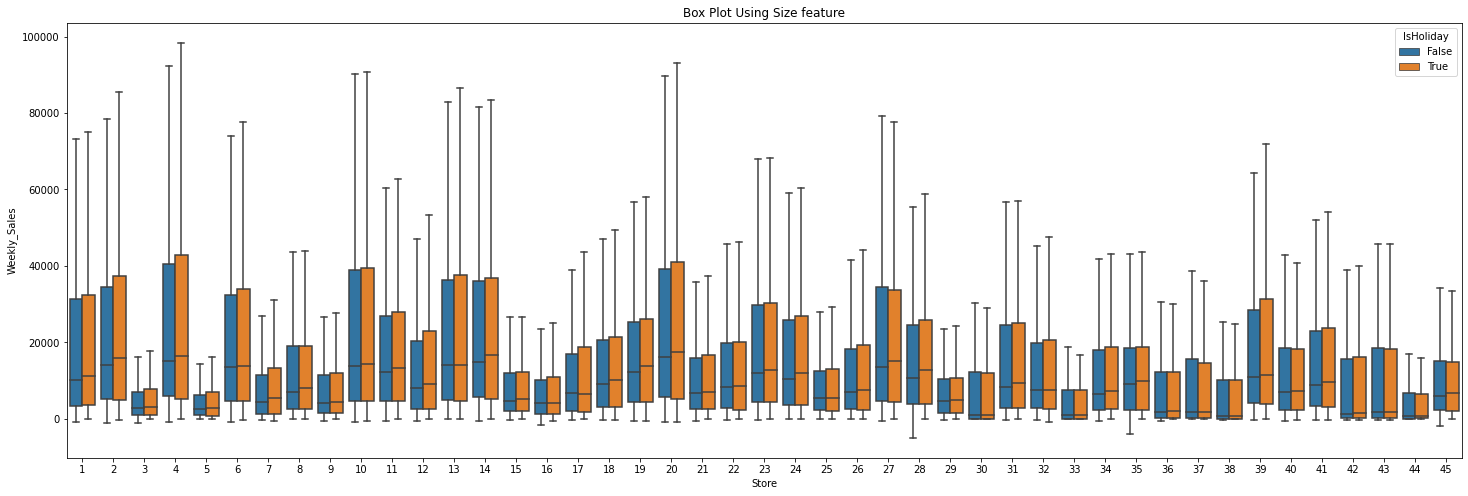

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot Using Size feature")
plt.show()

It can be seen that holidays has some impact on sales of store. for many store, sales have increased.

Now Let's look at the Department Feature and see theimpacr of it on sales.

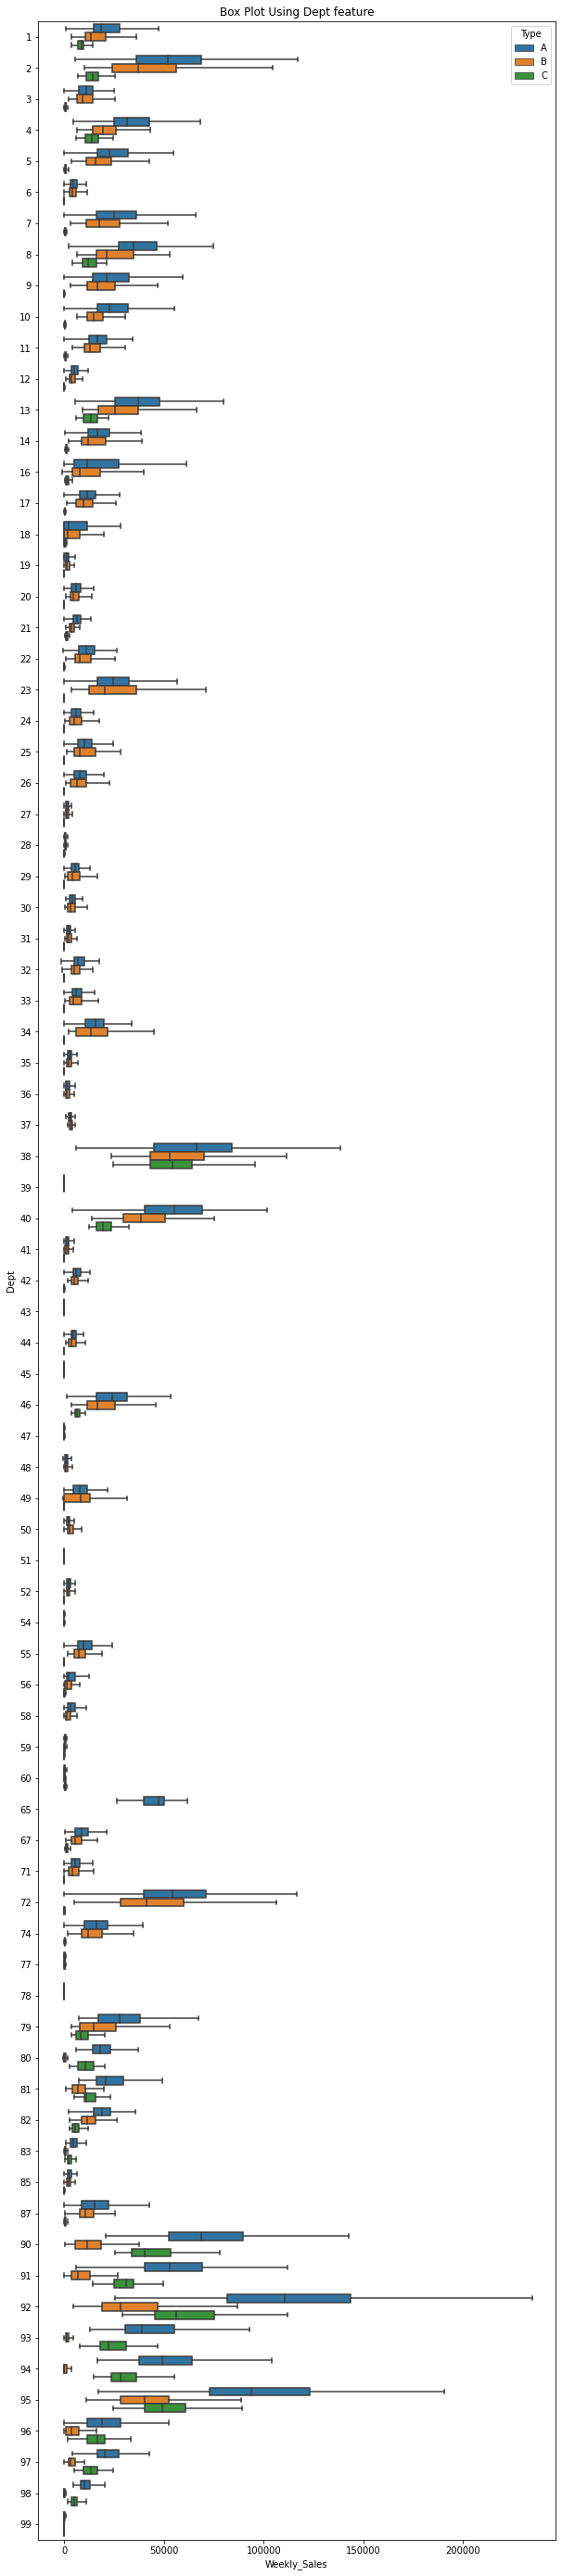

In [ ]:
fig, ax = plt.subplots(figsize=(10, 50))
fig = sns.boxplot(y='Dept', x='Weekly_Sales', data=train, showfliers=False, hue="Type",orient="h") 
plt.title("Box Plot Using Dept feature")
plt.show()

Department can be a factor in predicting sales as it can be seen through box plot that every department has a different sales than other. Further,  department factor is also correlated with type as it can be seen that type A has higher sales in most of the department.

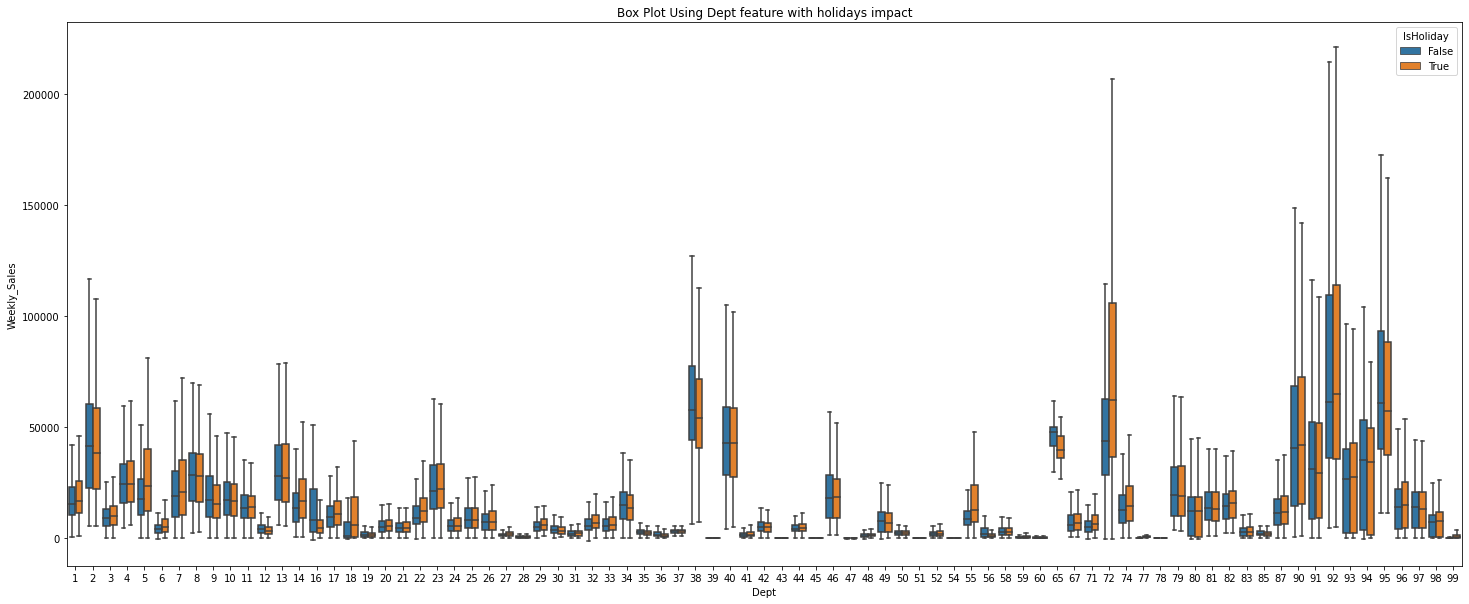

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot Using Dept feature with holidays impact")
plt.show()

As it can be seen through Box plot, there is not much to conclude from it except that in most department sales increase but in some it even get lesser than normal week which can tell that some department  are not useful in holidays season.

#### Now Let's create Month end feature and month start becasue people tend to have less salary at the end of month and at month start people get salary so let's check if has any impact on sales

In [ ]:
train['Is_month_end'] = np.where(train.Day > 22, 1, 0)
train['Is_month_start'] = np.where(train.Day<7,1,0)
train['Is_month_end'] = train['Is_month_end'].astype('bool')
train['Is_month_start'] = train['Is_month_start'].astype('bool')

In [ ]:
print("Correlation of Is_month_end feature with weekly_sales")
print(correlation_ratio(train['Is_month_end'],train['Weekly_Sales']))
print(50*'*')
print("Correlation of Is_month_start feature with weekly_sales")
print(correlation_ratio(train['Is_month_start'],train['Weekly_Sales']))
print(50*'*')

Correlation of Is_month_end feature with weekly_sales
5.109982375092706e-06
**************************************************
Correlation of Is_month_start feature with weekly_sales
1.919291806025242e-05
**************************************************


Very less correlation between weekly_sales and These two features.

In [ ]:
sales_month_end = train['Weekly_Sales'][train['Is_month_end']==1]
sales_not_month_end = train['Weekly_Sales'][train['Is_month_end']==0]
print("Mean of the sales in month end week: ", np.mean(sales_month_end))
print("Standard devition of the sales in month end week: ", np.std(sales_month_end))
print("Max sales in month end week: ", np.max(sales_month_end))
print("Mean of the sales other than month end week: ", np.mean(sales_not_month_end))
print("Standard devition of the sales other than month end week: ", np.std(sales_not_month_end))
print("Max sales other than month end week: ", np.max(sales_not_month_end))
print("*"*100)

Mean of the sales in month end week:  16063.6681276195
Standard devition of the sales in month end week:  23601.151162303115
Max sales in month end week:  693099.36
Mean of the sales other than month end week:  15949.275213958324
Standard devition of the sales other than month end week:  22356.130945246805
Max sales other than month end week:  293966.05
****************************************************************************************************


Looking at these data  it can be said that is_month_end have very less value to provide as it's max is very high compared to normal week that's why it's mean is high.

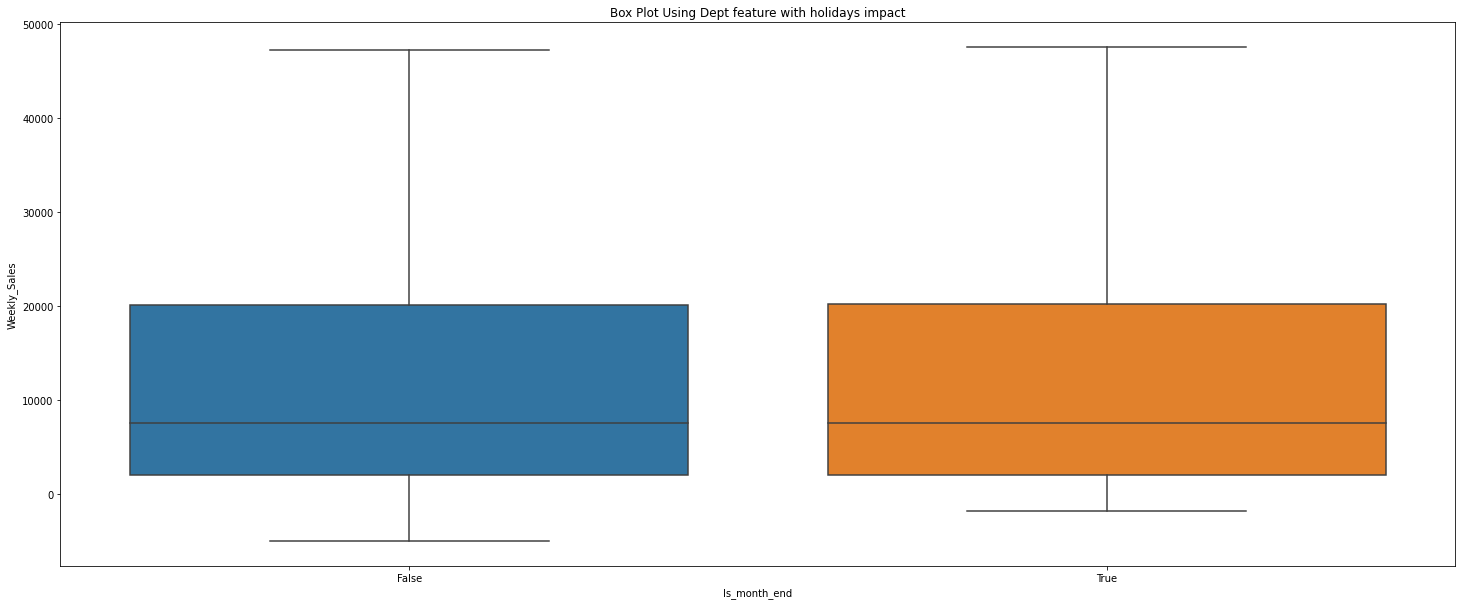

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Is_month_end', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Dept feature with holidays impact")
plt.show()

if you see that month end have no impact on sales.So this feature is not useful.

In [ ]:
sales_month_start = train['Weekly_Sales'][train['Is_month_start']==1]
sales_not_month_start = train['Weekly_Sales'][train['Is_month_start']==0]
print("Mean of the sales in month start week: ", np.mean(sales_month_start))
print("Standard devition of the sales in month start week: ", np.std(sales_month_start))
print("Max sales in month start week: ", np.max(sales_month_start))
print("Mean of the sales other than month start week: ", np.mean(sales_not_month_start))
print("Standard devition of the sales other than month start week: ", np.std(sales_not_month_start))
print("Max sales other than month start week: ", np.max(sales_not_month_start))
print("*"*100)

Mean of the sales in month start week:  16178.467199541716
Standard devition of the sales in month start week:  22668.762563068187
Max sales in month start week:  293966.05
Mean of the sales other than month start week:  15931.059406875496
Standard devition of the sales other than month start week:  22721.66187138904
Max sales other than month start week:  693099.36
****************************************************************************************************


It has more value than month end feature as mean is high irresprective of max value is less than normal week but still not significant change is there.

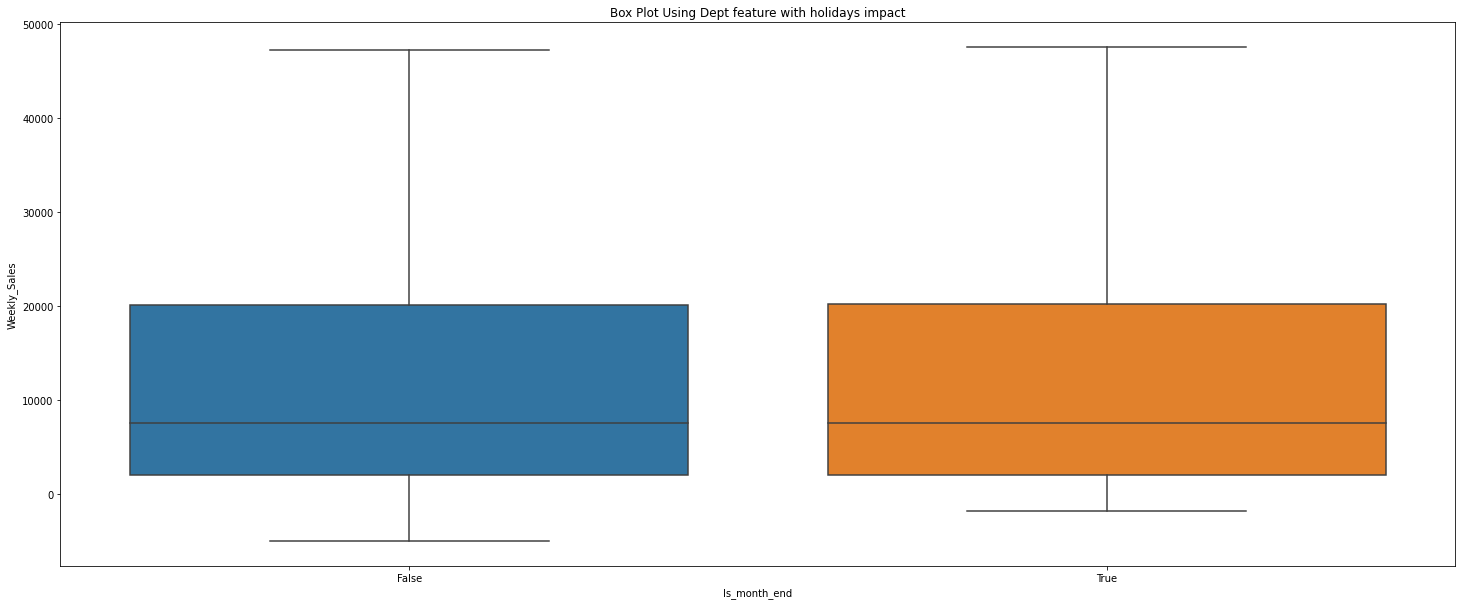

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Is_month_end', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Dept feature with holidays impact")
plt.show()

This feature is also not useful

#### Now let's deep dive into  weekly_sales feature nature

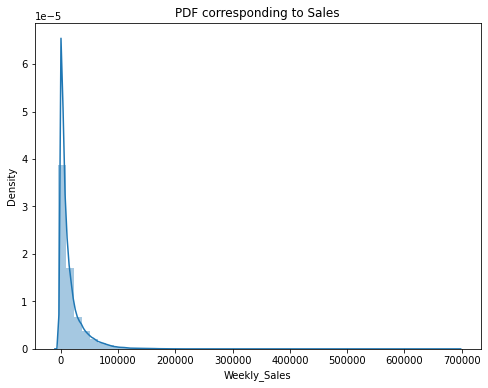

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['Weekly_Sales'])
plt.title("PDF corresponding to Sales")
plt.show()

Most of the week have sales between 0 to 30000.

[403124  16570   1727    105     19     18      3      0      0      4]
[9.56244515e-01 3.93054534e-02 4.09659131e-03 2.49068957e-04
 4.50696207e-05 4.26975354e-05 7.11625590e-06 0.00000000e+00
 0.00000000e+00 9.48834120e-06]
[ -4988.94  64819.89 134628.72 204437.55 274246.38 344055.21 413864.04
 483672.87 553481.7  623290.53 693099.36]


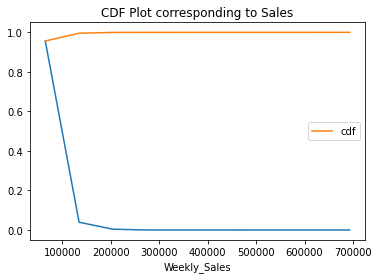

In [ ]:
counts,bin_edges=np.histogram(train['Weekly_Sales'],bins=10,density=False)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],pdf)
plot1,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('Weekly_Sales')
plt.title("CDF Plot corresponding to Sales")
plt.legend([plot1],['cdf'])
plt.show()

Almost 90 percent time sales are below 150000.

In [ ]:
print("Skewness: ", train['Weekly_Sales'].skew())
print("Kurtosis: ", train['Weekly_Sales'].kurt())

Skewness:  3.2620081854656657
Kurtosis:  21.49128990832619


It can be said that there are some month very high sales than other and aforementionedpoints told that these month are november and december. 

In [ ]:
train['Weekly_Sales'].min()
negative_sales = train[train['Weekly_Sales']<0]

-4988.94

It can be seen that the minimum salary is -4988 which and looking at the data there are 1285 sales are negative.Sales can not be negative.So we'll remove them

#### Now let's look at the positive value of weekly_sales

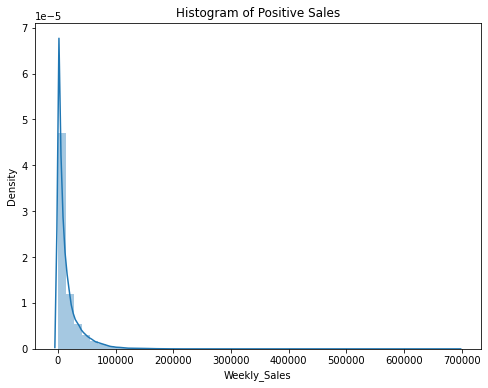

In [ ]:
positive_sales=train[train['Weekly_Sales']>0]['Weekly_Sales']
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(positive_sales)
plt.title("Histogram of Positive Sales")
plt.show()

Not much to conclude from it.

### Let's check the Markdown Values Now

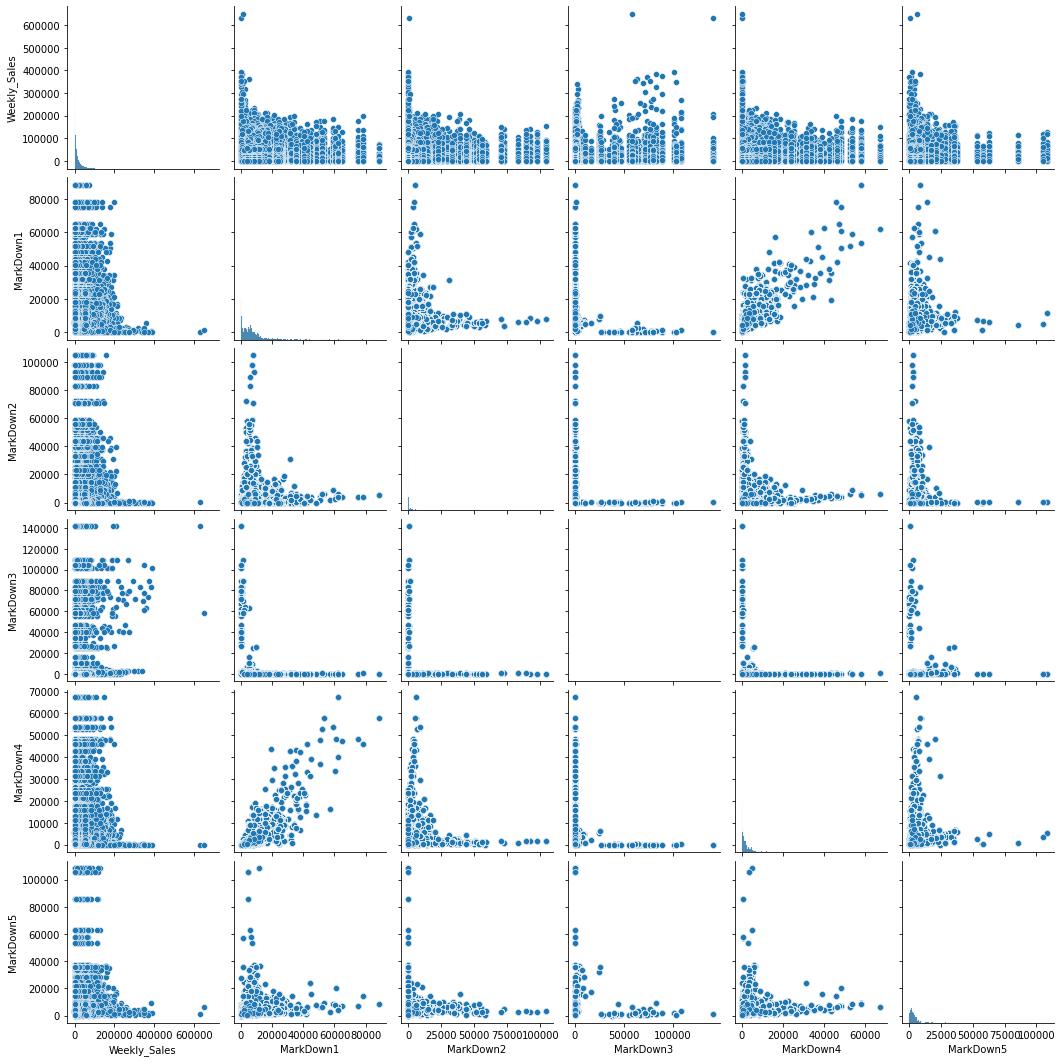

In [ ]:
sns.pairplot(train,vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

Markdown 1 and markdown 4 are correlated to some extent.
Later if these markdown do not provide much value then they can be droped and it can be seen through pairplot and heatmap also that these columns are very less correlated with weekly_sales.



<function matplotlib.pyplot.show(close=None, block=None)>

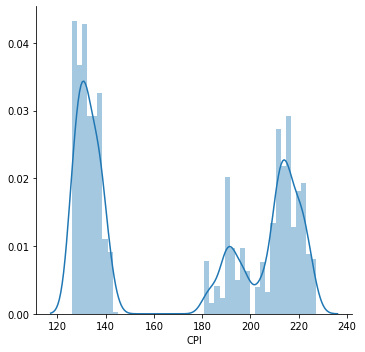

In [ ]:
sns.FacetGrid(train,size = 5).map(sns.distplot,"CPI").add_legend();
plt.show

between 150 to 170  value of CPI there is no datapoint.

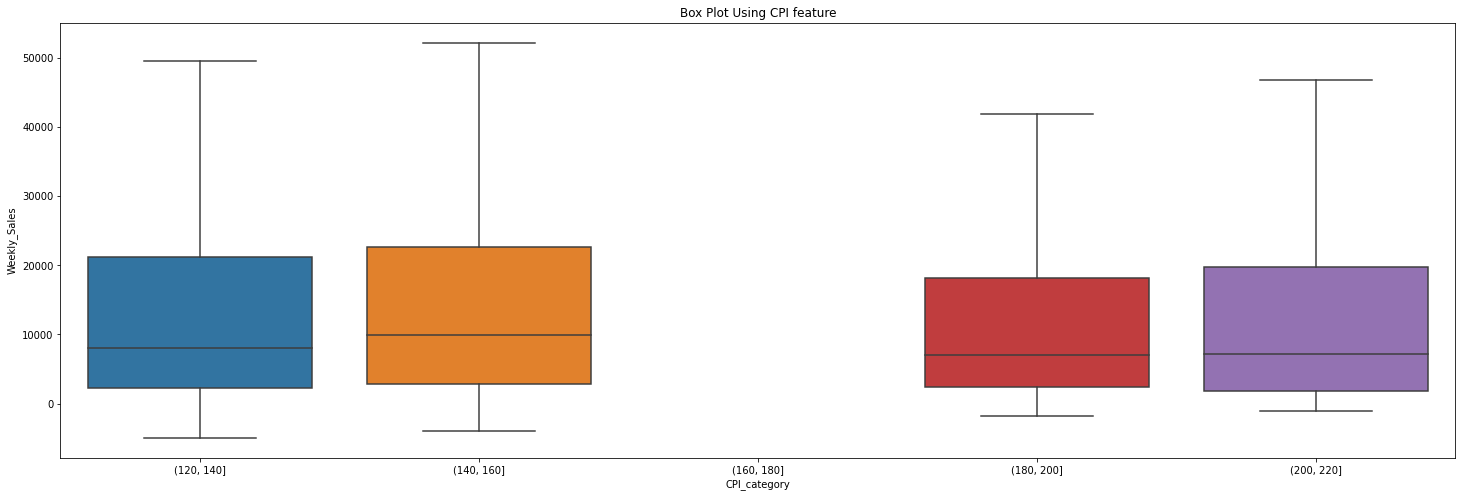

In [ ]:
train['CPI_category'] = pd.cut(train['CPI'],bins=[120,140,160,180,200,220])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='CPI_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

CPI between 160 to 180 as no datapoints so no sales. apart from that not much difference while change in the CPI during that period.

<function matplotlib.pyplot.show(close=None, block=None)>

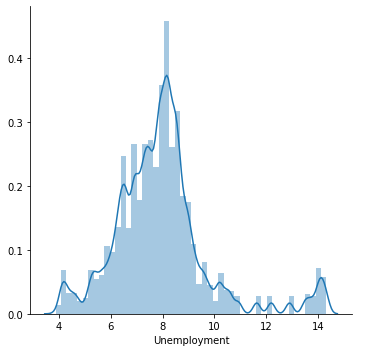

In [ ]:
sns.FacetGrid(train,size=5).map(sns.distplot,"Unemployment").add_legend();
plt.show

Most of the point lies when umployement rate is 8.

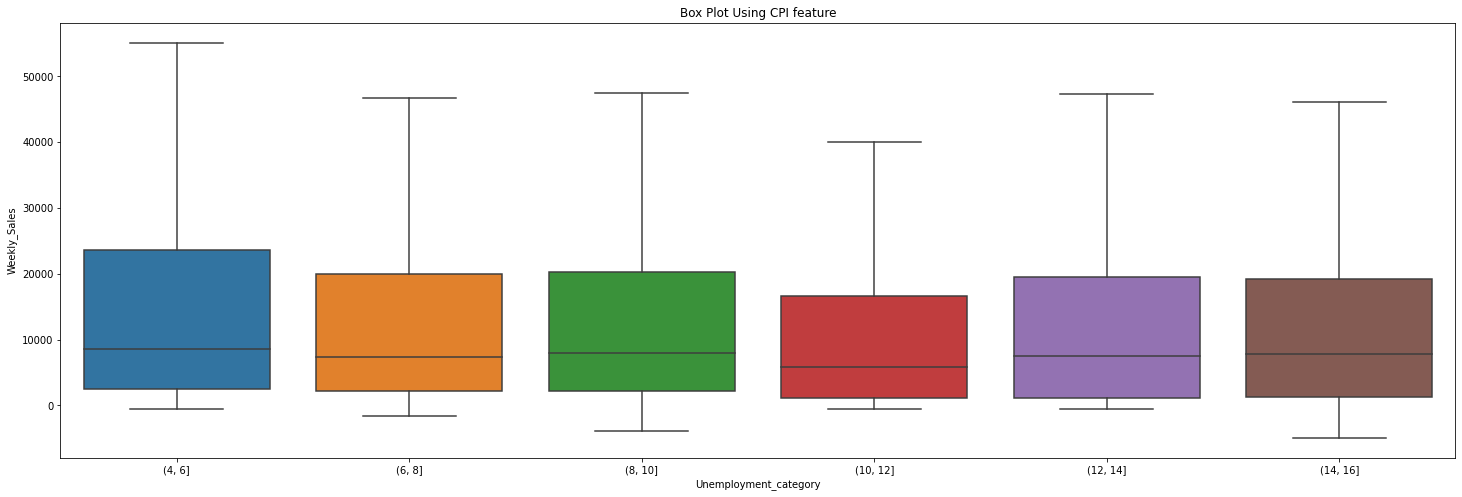

In [ ]:
train['Unemployment_category'] = pd.cut(train['Unemployment'],bins=[4,6,8,10,12,14,16])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Unemployment_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

Mean value of all box plot range are comparartively equal so it is not useful in determining sales of store.so it can be removed

<function matplotlib.pyplot.show(close=None, block=None)>

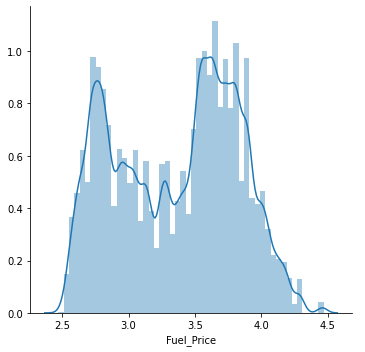

In [ ]:
sns.FacetGrid(train,size=5).map(sns.distplot,"Fuel_Price").add_legend();
plt.show

Here it looks no of datapoints are higher when fuel rate was between 3.5 to 4.0 and 2.5-3.0 .

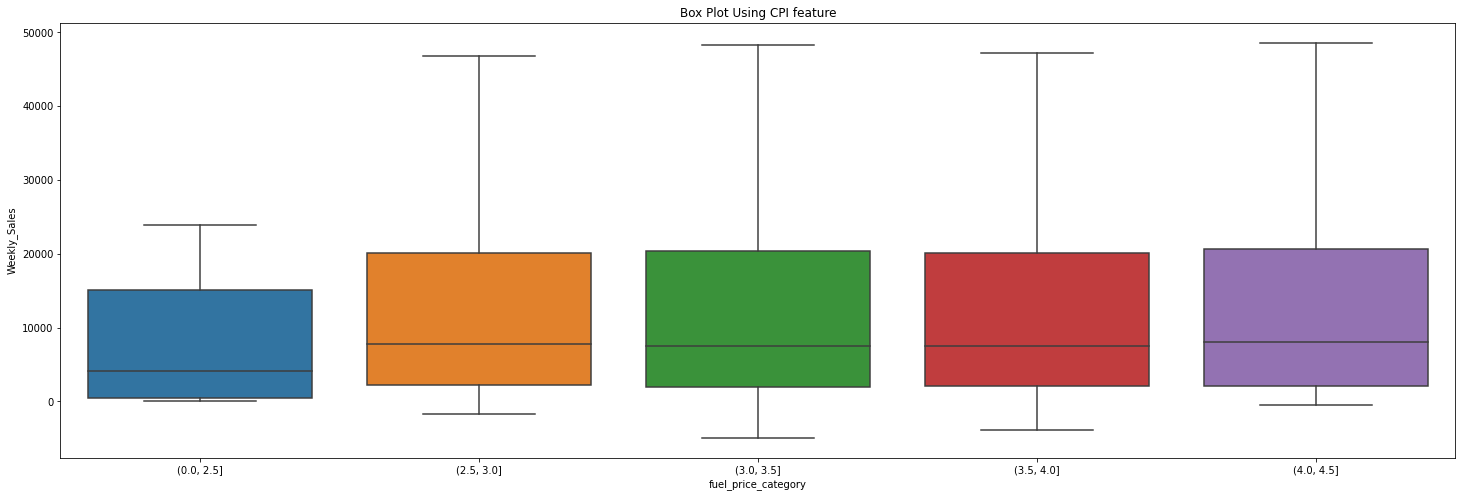

In [ ]:
train['fuel_price_category'] = pd.cut(train['Fuel_Price'],bins=[0,2.5,3,3.5,4,4.5])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='fuel_price_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

Fuel price has very less impact on sales as there is no change in sales as price increasing.So this feature can also be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

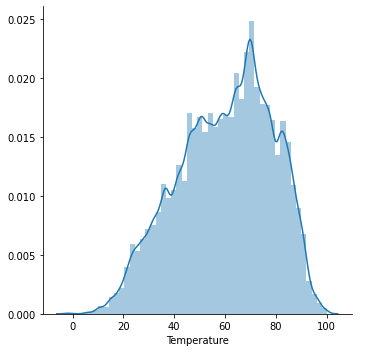

In [ ]:
sns.FacetGrid(train,size=5).map(sns.distplot,"Temperature").add_legend();
plt.show

through here it can be seen that most of the data point lies in 60-80 F temperatures assuming most of the sales also happens here.

Though let's check the distrubtion on the basis of +ve sales.

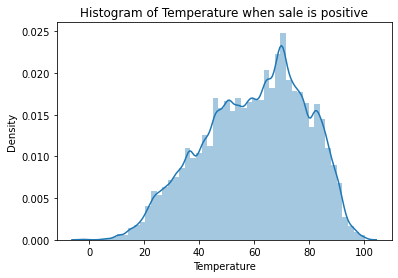

In [ ]:
positive_temperature = train[train['Weekly_Sales']>0]['Temperature']
sns.distplot(positive_temperature)
plt.title("Histogram of Temperature when sale is positive")
plt.show()

This graph is also telling the same thing that 60-80 F temperature have more number of times of sale.

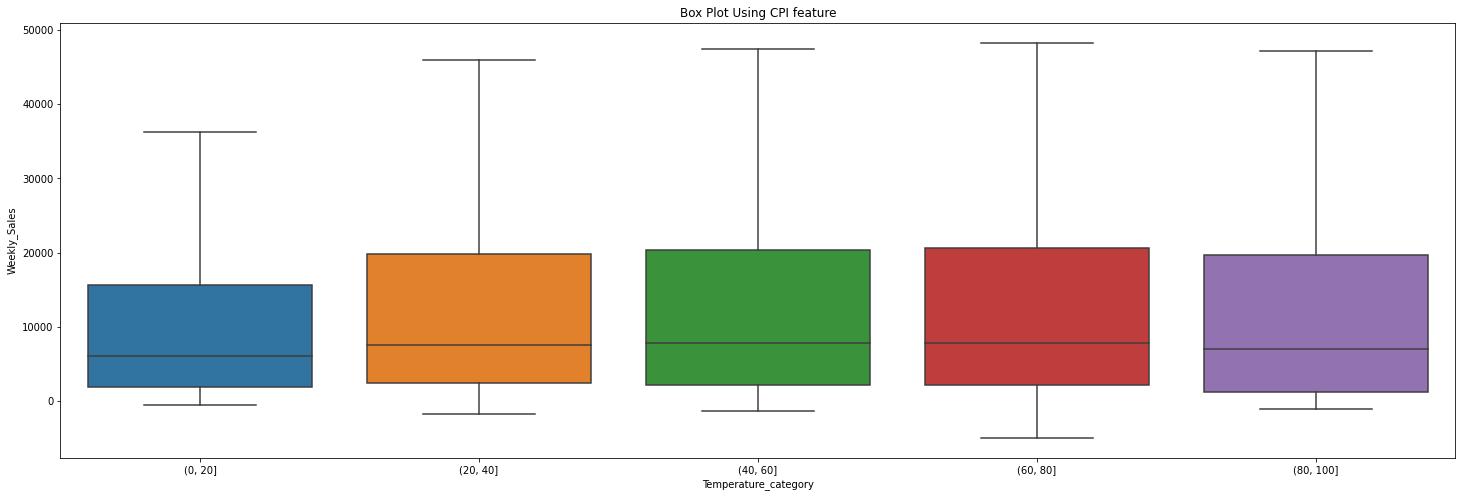

In [ ]:
train['Temperature_category'] = pd.cut(train['Temperature'],bins=[0,20,40,60,80,100])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Temperature_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

here it seems 60-80 temperature have almost same sale as in other category of temperature.So this feature can also be removed.

**Let's find more holidays and create a feature as no of holidays in that week**

In [9]:
dates =[]
for ptr in holidays.US(years = 2010).items():
    dates.append(ptr[0])
for ptr in holidays.US(years = 2011).items():
    dates.append(ptr[0])
for ptr in holidays.US(years = 2012).items():
    dates.append(ptr[0])
holidays=[] 
for index, row in train.iterrows():
    dat = train['Date'][index]
    dt=[]
    for i in range(0,5):
        dt.append(dat - datetime.timedelta(days = i))
    for i in range(1,3):
        dt.append(dat + datetime.timedelta(days = i))
    count = 0
    for date in dates:
        if date in dt:
            count +=1
    holidays.append(count)
    
train['Holidays'] = np.array(holidays)

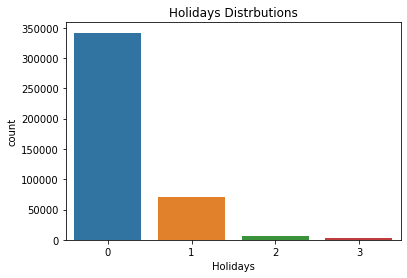

In [ ]:
sns.countplot(train['Holidays']);
plt.title("Holidays Distrbutions")
plt.show()

There are very less week with 2 holidays and most of the week have no holidays. 

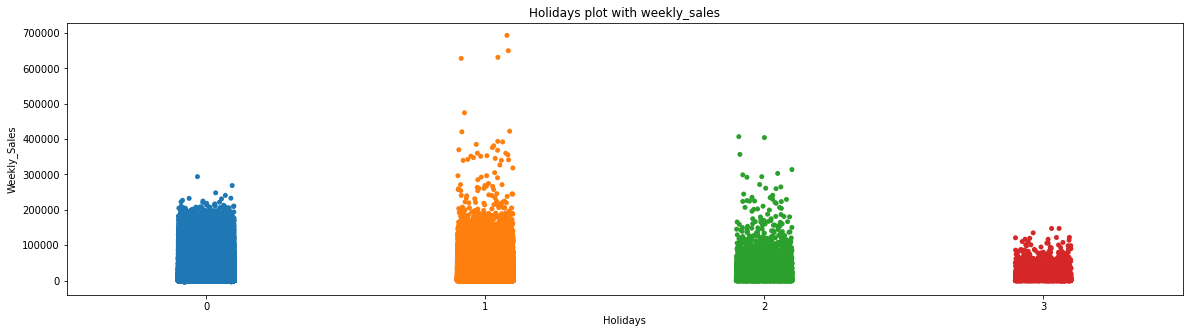

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.stripplot(y=train['Weekly_Sales'], x=train['Holidays'])
plt.title("Holidays plot with weekly_sales")
plt.show()

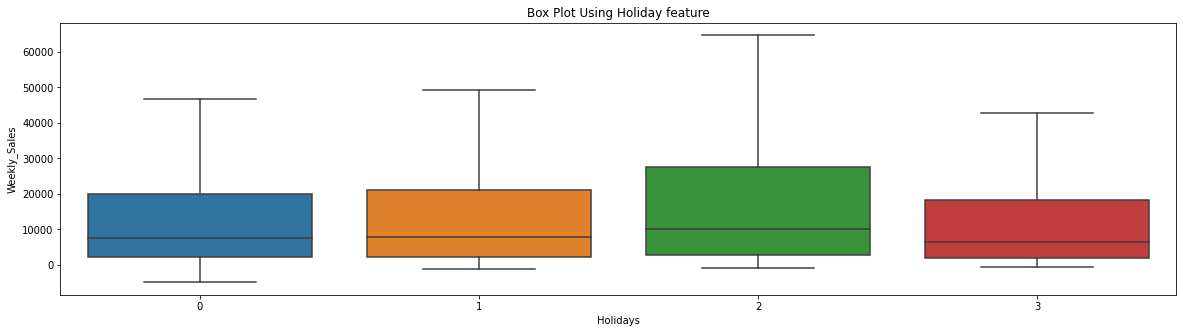

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig = sns.boxplot(x='Holidays', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Holiday feature")
plt.show()

When Holidays are two in  a week then weekly_sales are bit higher.

## Let's create some more features from AutoEncoder 

Epoch 1/5
17597/17597 - 30s - loss: 0.0277 - val_loss: 0.0121
Epoch 2/5
17597/17597 - 29s - loss: 0.0157 - val_loss: 0.0053
Epoch 3/5
17597/17597 - 29s - loss: 0.0126 - val_loss: 0.0047
Epoch 4/5
17597/17597 - 29s - loss: 0.0117 - val_loss: 0.0049
Epoch 5/5
17597/17597 - 29s - loss: 0.0113 - val_loss: 0.0047


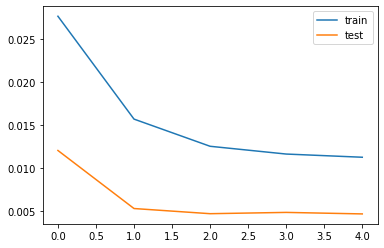

In [ ]:
# https://machinelearningmastery.com/autoencoder-for-classification/
train = train[train['Weekly_Sales']>0]
data = train[['Store', 'Size', 'Dept', 'Month','Type', 'Year','Week', 'Day' ,'IsHoliday','Holidays']]
n_inputs = data.shape[1]
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes
X_train, X_test, y_train, y_test = train_test_split(data, train['Weekly_Sales'], test_size=0.33, random_state=1)
t = StandardScaler()
t.fit(data)
train_data = t.transform(X_train)
test_data = t.transform(X_test)

# define encoder
inputs = Input(shape=(n_inputs,))

# encoder level 1
encoder = Dense(n_inputs*2)(visible)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)

# encoder level 2
encoder = Dense(n_inputs)(encoder)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)

# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)

# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

# output layer
output = Dense(n_inputs, activation='linear')(decoder)

# define autoencoder model
model = Model(inputs=inputs, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

# fit the autoencoder model to reconstruct input
history = model.fit(train_data, train_data, epochs=5, batch_size=16, verbose=2, validation_data=(test_data,test_data))

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

**Let's check the performance of model without Using encoded values**

In [ ]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(WMAE(X_test,y_test, yhat))

1484.98


**After Using AutoEncoder**

In [ ]:
X_train_encode = encoder.predict(train_data)
X_test_encode = encoder.predict(test_data)

tr_data = np.hstack((X_train, X_train_encode))
te_data = np.hstack((X_test,X_test_encode))

clf = RandomForestRegressor()
clf.fit(tr_data, y_train.values)
yhat = clf.predict(te_data)

print(WMAE(X_test,y_test, yhat))

1694.82


it deteriorate the performance of WMAE so features of autoencoders are not useful

In [ ]:
g = train.groupby(["Month","Store"])
monthly_averages = g.aggregate({"Weekly_Sales":np.mean})
store_value=monthly_averages.loc[monthly_averages.groupby('Month')['Weekly_Sales'].idxmax()]
print("Stores which have highest value during that  Month: ")
store_value

Stores which have highest value during that  Month: 


,,Weekly_Sales
Month,Store,
1,4,26745.425906
2,20,30464.008370
3,14,28363.344793
4,14,29467.913047
5,14,29231.265922
6,20,29803.121209
7,20,28857.317280
8,4,29082.862586
9,4,27925.529893


It can be seen that 3 stores are more prominent than all others. Store 20 has highest Sale during Thanksgiving and Christmas which were more impactful than Labour's Day and Super Bowl

#### As we can see that thanksgiving and christmas are more impactful than other two.so every holiday has its own level of impact .So we can make a category of holidays as feature.

In [4]:
create_Holiday_Type(train)

### Now let's check Nan values impact

In [ ]:
train.isnull().mean()

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Year            0.000000
Month           0.000000
Week            0.000000
Day             0.000000
n_days          0.000000
Type            0.000000
Size            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
dtype: float64

Through this you can see that Markdown values have high percentage of Nan values.

**As Markdown Values event precede the Holidays so there could be an impact of them on Weekly_Sales.So simply giving 0 or removing these column could lose some information. So better let machine learning model learn the pattern hiiden in it then fill the null values.**

In [ ]:
# https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression
missing_columns = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
for feature in missing_columns:
    train[feature + '_imp'] = train[feature]
    train = random_imputation(train, feature)
y = pd.get_dummies(train.Type, prefix='Type')
train = pd.concat([train, y], axis=1)

data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    data["Det" + feature] = train[feature + "_imp"]
    column_list = list(set(train.columns) - set(missing_columns) - {feature + '_imp'} - {'Date'} -{'Type'})

    model = LinearRegression()
    model.fit(X = train[column_list], y = train[feature + '_imp'])

    predict = model.predict(train[column_list])
    std_error = (predict[train[feature].notnull()] - train.loc[train[feature].notnull(), feature + '_imp']).std()
    
    random_predict = np.random.normal(size = train[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    data.loc[(train[feature].isnull()) & (random_predict > 0), "det" + feature] = random_predict[(train[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [ ]:
train.isnull().mean()

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Year             0.000000
Month            0.000000
Week             0.000000
Day              0.000000
n_days           0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.642572
MarkDown2        0.736110
MarkDown3        0.674808
MarkDown4        0.679847
MarkDown5        0.640790
CPI              0.000000
Unemployment     0.000000
Type_A           0.000000
Type_B           0.000000
Type_C           0.000000
MarkDown1_imp    0.000000
MarkDown2_imp    0.000000
MarkDown3_imp    0.000000
MarkDown4_imp    0.000000
MarkDown5_imp    0.000000
Type_A           0.000000
Type_B           0.000000
Type_C           0.000000
dtype: float64

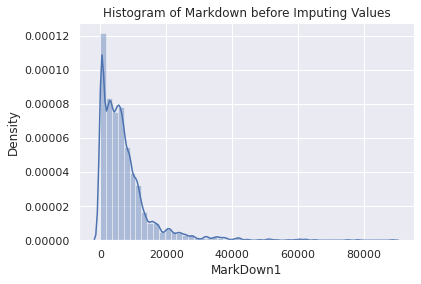

In [ ]:
sns.distplot(train['MarkDown1'])
plt.title("Histogram of Markdown before Imputing Values")
plt.show()

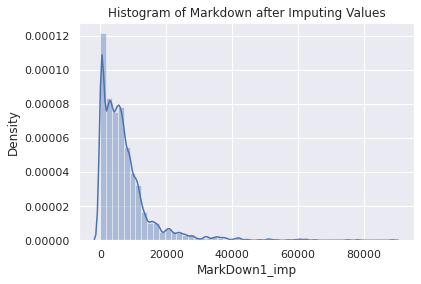

In [ ]:
sns.distplot(train['MarkDown1_imp'])
plt.title("Histogram of Markdown after Imputing Values")
plt.show()

Distrbutions are almost same

In [ ]:
train["MarkDown1"] = train['MarkDown1_imp']
train["MarkDown2"] = train['MarkDown2_imp']
train["MarkDown3"] = train['MarkDown3_imp']
train["MarkDown4"] = train['MarkDown4_imp']
train["MarkDown5"] = train['MarkDown5_imp']

train=train.drop(['MarkDown1_imp', 'MarkDown2_imp', 'MarkDown3_imp', 'MarkDown4_imp', 'MarkDown5_imp', 'Type_A', 'Type_B', 'Type_C'], axis=1)

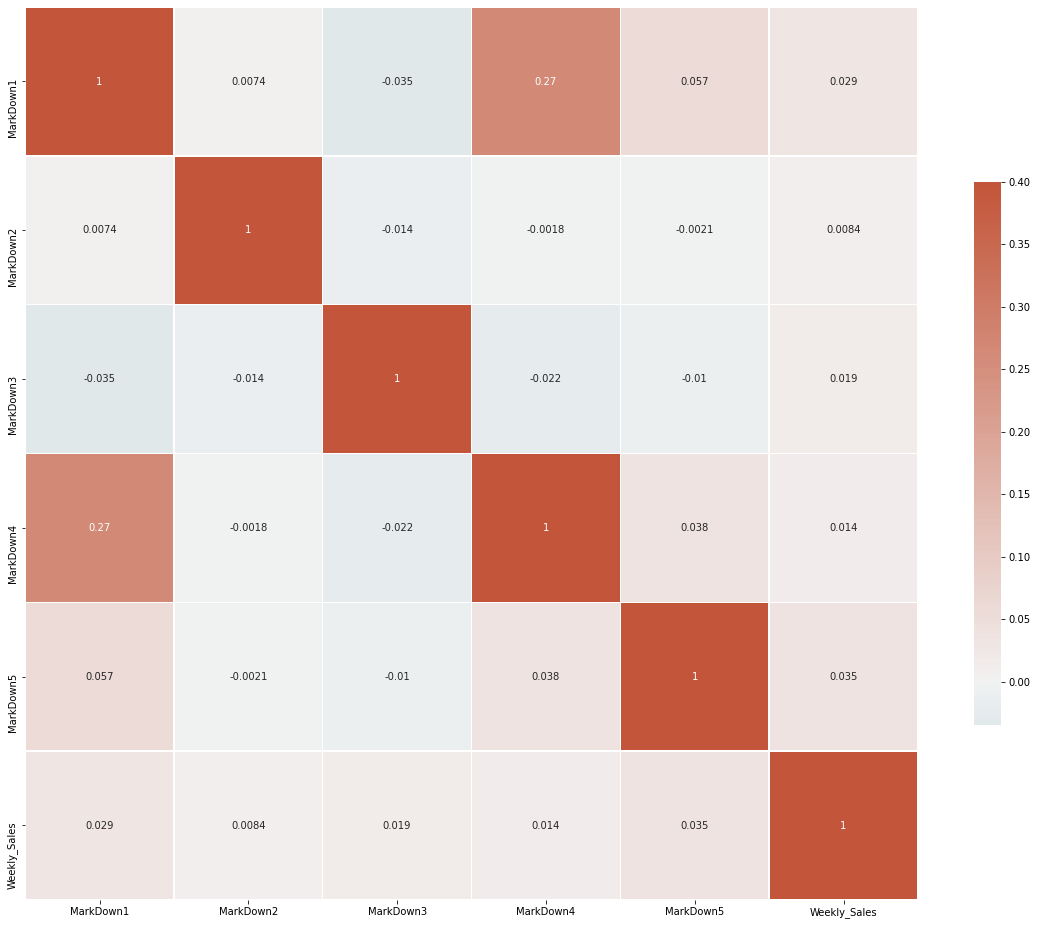

In [ ]:
data = pd.concat([train['MarkDown1'],train['MarkDown2'],train['MarkDown3'],train['MarkDown4'],
                  train['MarkDown5'],train['Weekly_Sales']], axis=1)
corr = data.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.4, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Now Markdown Values are very less correlated to Weekly_sales .And markdown 1 and markdown4 are also higly correlated .So We can drop them

**Let's Create the most Basic model(Mean and Median) Model and check It's performance So that When we create Machine Learning model we have the most basic model to compare with**

In [ ]:
Mean = np.mean(train['Weekly_Sales'])
predicted_value  = np.full((train.shape[0]), Mean)
print("Model Performance(WMAE) of Mean Model: ",WMAE(train,train['Weekly_Sales'], predicted_value))

Model Performance(WMAE) of Mean Model:  15350.22


In [ ]:
Mean = np.median(train['Weekly_Sales'])
predicted_value  = np.full((train.shape[0]), Mean)
print("Model Performance(WMAE) of Median Model: ",WMAE(train,train['Weekly_Sales'], predicted_value))

Model Performance(WMAE) of Median Model:  13625.26


## Creating dateset for training purpopse

In [10]:
train = train[train['Weekly_Sales']>0]
data = train[['Store', 'Size', 'Dept', 'Month','Type', 'Year','Week', 'Day','n_days' ,'IsHoliday','Holidays','HolidayType','CPI']]
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, train['Weekly_Sales'], test_size=0.2)
t = StandardScaler()
t.fit(X_train)
train_data = t.transform(X_train)
test_data = t.transform(X_test)

# Creating Dataset for Testing

In [ ]:
create_Holiday_Type(test)

test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Week']=test['Date'].dt.week
test['Day']=test['Date'].dt.day
test['n_days']=(test['Date'].dt.date-train['Date'].dt.date.min()).apply(lambda x:x.days)

test = test.merge(stores, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

dates =[]
for ptr in holidays.US(years = 2010).items():
    dates.append(ptr[0])
for ptr in holidays.US(years = 2011).items():
    dates.append(ptr[0])
for ptr in holidays.US(years = 2012).items():
    dates.append(ptr[0])
holidays=[] 
for index, row in test.iterrows():
    dat = row['Date']
    dt=[]
    for i in range(0,5):
      dt.append(dat - datetime.timedelta(days = i))
    for i in range(1,3):
      dt.append(dat + datetime.timedelta(days = i))
    count = 0
    for date in dates:
      if date in dt:
         count +=1
    holidays.append(count)
 
test['Holidays'] = np.array(holidays)

data_test = test[['Store', 'Size', 'Dept', 'Month','Type', 'Year','Week', 'Day','n_days' ,'IsHoliday','Holidays','HolidayType','CPI']]
data_test['Type'] = data_test['Type'].astype('category')
data_test['Type'] = data_test['Type'].cat.codes

### Let's check which models performs best using WMAE as performance metrics to rule out all the Bad models for hyper parameter tuning

In [16]:
model_list = {'linear regression':SGDRegressor(),'SVR':SGDRegressor(loss = 'epsilon_insensitive'),
              'RidgeCV':RidgeCV(),'ElasticNet':ElasticNet(),
              'RandomForest':RandomForestRegressor(),'XGboost':lgb.LGBMRegressor()}

for  model_name,model in model_list.items():
     model.fit(X_train,y_train)
     predicted = model.predict(X_test)
     print('WMAE score of ',model_name,' : ',WMAE(X_test,y_test,predicted))
     print(100*'-')

WMAE score of  linear regression  :  1.3978614345983337e+18
----------------------------------------------------------------------------------------------------
WMAE score of  SVR  :  734286.36
----------------------------------------------------------------------------------------------------
WMAE score of  RidgeCV  :  14816.99
----------------------------------------------------------------------------------------------------
WMAE score of  ElasticNet  :  14775.04
----------------------------------------------------------------------------------------------------
WMAE score of  RandomForest  :  1424.24
----------------------------------------------------------------------------------------------------
WMAE score of  XGboost  :  4244.98
----------------------------------------------------------------------------------------------------


RandomForest and XGboost are most best model out of all.
We can also try elastic net also

**Let's hypertune the aforementioned model**

## Random Forest Regressor

In [ ]:
n_estimators = [100,120,140]
max_depth = [25, 27, 30]
random_forest(n_estimators, max_depth)

k: 1 , n_estimators: 100 , max_depth: 25
k: 2 , n_estimators: 100 , max_depth: 25
k: 3 , n_estimators: 100 , max_depth: 25
k: 4 , n_estimators: 100 , max_depth: 25
WMAE: 1446.8874999999998
k: 1 , n_estimators: 100 , max_depth: 27
k: 2 , n_estimators: 100 , max_depth: 27
k: 3 , n_estimators: 100 , max_depth: 27
k: 4 , n_estimators: 100 , max_depth: 27
WMAE: 1406.7475000000002
k: 1 , n_estimators: 100 , max_depth: 30
k: 2 , n_estimators: 100 , max_depth: 30
k: 3 , n_estimators: 100 , max_depth: 30
k: 4 , n_estimators: 100 , max_depth: 30
WMAE: 1417.2475
k: 1 , n_estimators: 120 , max_depth: 25
k: 2 , n_estimators: 120 , max_depth: 25
k: 3 , n_estimators: 120 , max_depth: 25
k: 4 , n_estimators: 120 , max_depth: 25
WMAE: 1419.4924999999998
k: 1 , n_estimators: 120 , max_depth: 27
k: 2 , n_estimators: 120 , max_depth: 27
k: 3 , n_estimators: 120 , max_depth: 27
k: 4 , n_estimators: 120 , max_depth: 27
WMAE: 1415.1875
k: 1 , n_estimators: 120 , max_depth: 30
k: 2 , n_estimators: 120 , max_d

**Best parameters are n_estimators = 100, max_depth = 27**

In [ ]:
RF = RandomForestRegressor(n_estimators= 100 , max_depth= 27)
RF.fit(data,train['Weekly_Sales'])

### WMAE score of predicting the Weekly_sales on Test Dateset Using Random Forest

In [ ]:
predict_Sales(RF,'1')

<img src="RF.png">

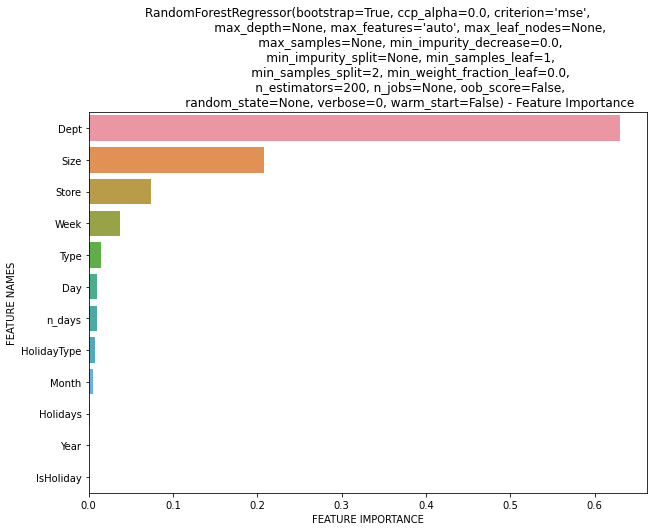

In [ ]:
features_importance = RF.feature_importances_
   
plot_features_importance(
    features_importance,
    data.columns,
    RF
)

## Training Dataset with GBDT Regressor

In [ ]:
max_depth = [20,25]
n_estimators = [6000,7000,8000]
gbdt(n_estimators, max_depth)

k: 1 , n_estimators: 6000 , max_depth: 20
k: 2 , n_estimators: 6000 , max_depth: 20
k: 3 , n_estimators: 6000 , max_depth: 20
k: 4 , n_estimators: 6000 , max_depth: 20
WMAE: 1423.1125
k: 1 , n_estimators: 6000 , max_depth: 25
k: 2 , n_estimators: 6000 , max_depth: 25
k: 3 , n_estimators: 6000 , max_depth: 25
k: 4 , n_estimators: 6000 , max_depth: 25
WMAE: 1436.5400000000002
k: 1 , n_estimators: 7000 , max_depth: 20
k: 2 , n_estimators: 7000 , max_depth: 20
k: 3 , n_estimators: 7000 , max_depth: 20
k: 4 , n_estimators: 7000 , max_depth: 20
WMAE: 1416.3425000000002
k: 1 , n_estimators: 7000 , max_depth: 25
k: 2 , n_estimators: 7000 , max_depth: 25
k: 3 , n_estimators: 7000 , max_depth: 25
k: 4 , n_estimators: 7000 , max_depth: 25
WMAE: 1405.5575
k: 1 , n_estimators: 8000 , max_depth: 20
k: 2 , n_estimators: 8000 , max_depth: 20
k: 3 , n_estimators: 8000 , max_depth: 20
k: 4 , n_estimators: 8000 , max_depth: 20
WMAE: 1382.7775
k: 1 , n_estimators: 8000 , max_depth: 25
k: 2 , n_estimators:

**Best parameters are n_estimators = 8000, max_depth = 25**

In [ ]:
gb = lgb.LGBMRegressor(n_estimators=8000, max_depth=25)
gb.fit(data, train['Weekly_Sales'])

In [ ]:
predict_Sales(gb,'2')

<img src="GB.png">

## Training Dataset with Linear Regression(Elastic Net) 

In [ ]:
l1_ratio = np.linspace(0.5, 1.0, num=6)
linear_regression(l1_ratio)

k: 1 , l1_ratio: 0.5
k: 2 , l1_ratio: 0.5
k: 3 , l1_ratio: 0.5
k: 4 , l1_ratio: 0.5
WMAE: 15394.74
k: 1 , l1_ratio: 0.6
k: 2 , l1_ratio: 0.6
k: 3 , l1_ratio: 0.6
k: 4 , l1_ratio: 0.6
WMAE: 15340.665
k: 1 , l1_ratio: 0.7
k: 2 , l1_ratio: 0.7
k: 3 , l1_ratio: 0.7
k: 4 , l1_ratio: 0.7
WMAE: 15365.2275
k: 1 , l1_ratio: 0.8
k: 2 , l1_ratio: 0.8
k: 3 , l1_ratio: 0.8
k: 4 , l1_ratio: 0.8
WMAE: 15316.400000000001
k: 1 , l1_ratio: 0.9
k: 2 , l1_ratio: 0.9
k: 3 , l1_ratio: 0.9
k: 4 , l1_ratio: 0.9
WMAE: 15389.147500000001
k: 1 , l1_ratio: 1.0
k: 2 , l1_ratio: 1.0
k: 3 , l1_ratio: 1.0
k: 4 , l1_ratio: 1.0
WMAE: 14790.029999999999


**Best l1_ratio = 1.0**

In [ ]:
lr = ElasticNet(random_state=0,normalize = True,l1_ratio = 1.0)
lr.fit(data, train['Weekly_Sales'])

In [ ]:
predict_Sales(lr,'3')

<img src="LR.png">

## Training Dataset with Stacking Regressor

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

estimators = [
     ('lr', RidgeCV(normalize = True)),
     ('svr', LinearSVR(random_state=42)),
     ('gb', lgb.LGBMRegressor(n_estimators=7000, max_depth=25)),
     ('rf', RandomForestRegressor(n_estimators=150))]
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=RandomForestRegressor())
reg.fit(data,train['Weekly_Sales'])

In [ ]:
predict_Sales(reg,'4')

<img src="Stacking.png">

| Model | WMAE_SCORE | 
| --- | --- | 
| Random_Forest | 2646.35 |
| GBDT | 3054.37 |
| Elasatic Net | 19571.13 |
| Stacking | 6708.87 |